In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

In [78]:
# Import the hiring data from csv file
hiring_data = pd.read_csv("Hire data updated.csv")

# Clean up data frame
hiring_data = hiring_data.iloc[:,0:17]

# Show data frame
hiring_data

,Industry,Status,Company,LIanytime,LImonth,LIweek,LIday,GDmonth,GD - 2 wks,GDweek,GD - 3 days,GDday,Notes,Company size,Founded,Revenue,Layoff
0,Entertainment,gain,Activision,560,287,65,10.0,246,111.0,61,37.0,18,Hiring surge,1001-5000,1979.0,$500 million to $1 billion,NaN
1,Entertainment,gain,Netflix,165,165,79,17.0,60,46.0,20,11.0,5,Hiring surge,1001-5000,1997.0,$5-10 billion,NaN
2,Entertainment,loss,Live Nation Entertainment,0,1,0,0.0,1130,715.0,377,248.0,46,na,10000+,2005.0,$5-10 billion,https://www.thelayoff.com/t/SdBvPUq
3,Entertainment,loss,Cinemark,0,0,0,0.0,0,NaN,0,NaN,0,na,10000+,1984.0,$2-5 billion,NaN
4,Food,gain,Kroger,7144,5536,2160,117.0,496,456.0,248,134.0,59,Hiring surge,10000+,NaN,$10+ billion,NaN
5,Food,loss,McDonald's,5412,5066,2849,89.0,726,493.0,369,265.0,33,na,10000+,1955.0,$10+ billion,75% restaurants able to stay open with limited...
6,Food,gain,Campbell Soup,13,13,3,NaN,388,323.0,119,88.0,30,Hiring surge,10000+,1869.0,$5-10 billion,NaN
7,Food,loss,J Alexanders Holding,0,0,0,0.0,0,NaN,0,NaN,0,na,NaN,NaN,NaN,NaN
8,Misc,gain,Clorox,103,101,32,4.0,86,50.0,29,21.0,1,na,5001-10000,1913.0,$5-10 billion,NaN
9,Misc,gain,Clearwater Paper Corp,37,28,11,2.0,36,22.0,16,13.0,3,na,1001-5000,2008.0,$1-2 billion,NaN


In [93]:
# Clean up the data frame to LinkedIn
hiring_data_li = hiring_data.iloc[:,0:7]

# Create a data frame that only contains companies that are performing well
hiring_data_li_gain = hiring_data_li.loc[hiring_data_li["Status"]=="gain",:]

# Create a data frame that only contains companies that are not performing well
hiring_data_li_loss = hiring_data_li.loc[hiring_data_li["Status"]=="loss",:]

# Print the data frame
hiring_data_li

,Industry,Status,Company,LIanytime,LImonth,LIweek,LIday
0,Entertainment,gain,Activision,560,287,65,10.0
1,Entertainment,gain,Netflix,165,165,79,17.0
2,Entertainment,loss,Live Nation Entertainment,0,1,0,0.0
3,Entertainment,loss,Cinemark,0,0,0,0.0
4,Food,gain,Kroger,7144,5536,2160,117.0
5,Food,loss,McDonald's,5412,5066,2849,89.0
6,Food,gain,Campbell Soup,13,13,3,NaN
7,Food,loss,J Alexanders Holding,0,0,0,0.0
8,Misc,gain,Clorox,103,101,32,4.0
9,Misc,gain,Clearwater Paper Corp,37,28,11,2.0


In [94]:
# Groupy by the "Industry" and "Company" column
hiring_data_li_gain = hiring_data_li_gain.groupby(["Industry", "Company"])[["LIanytime", "LImonth", "LIweek", "LIday"]].max()

# Remove the comma in the data frame and change the type of numeric elements that are objects to float
hiring_data_li_gain["LImonth"] = hiring_data_li_gain["LImonth"].str.replace(",", "").astype(float)
hiring_data_li_gain["LIweek"] = hiring_data_li_gain["LIweek"].str.replace(",", "").astype(float)

# Print the data frame
hiring_data_li_gain

LIanytime  LImonth  LIweek  LIday
Industry      Company                                                 
Entertainment Activision                   560    287.0    65.0   10.0
              Netflix                      165    165.0    79.0   17.0
Food          Campbell Soup                 13     13.0     3.0    NaN
              Kroger                      7144   5536.0  2160.0  117.0
Misc          Clearwater Paper Corp         37     28.0    11.0    2.0
              Clorox                       103    101.0    32.0    4.0
Retail        Amazon                     22912  22912.0  4681.0  446.0
              Ebay                         106    106.0    19.0    4.0
Travel        Extended Stay                689    438.0    72.0    0.0

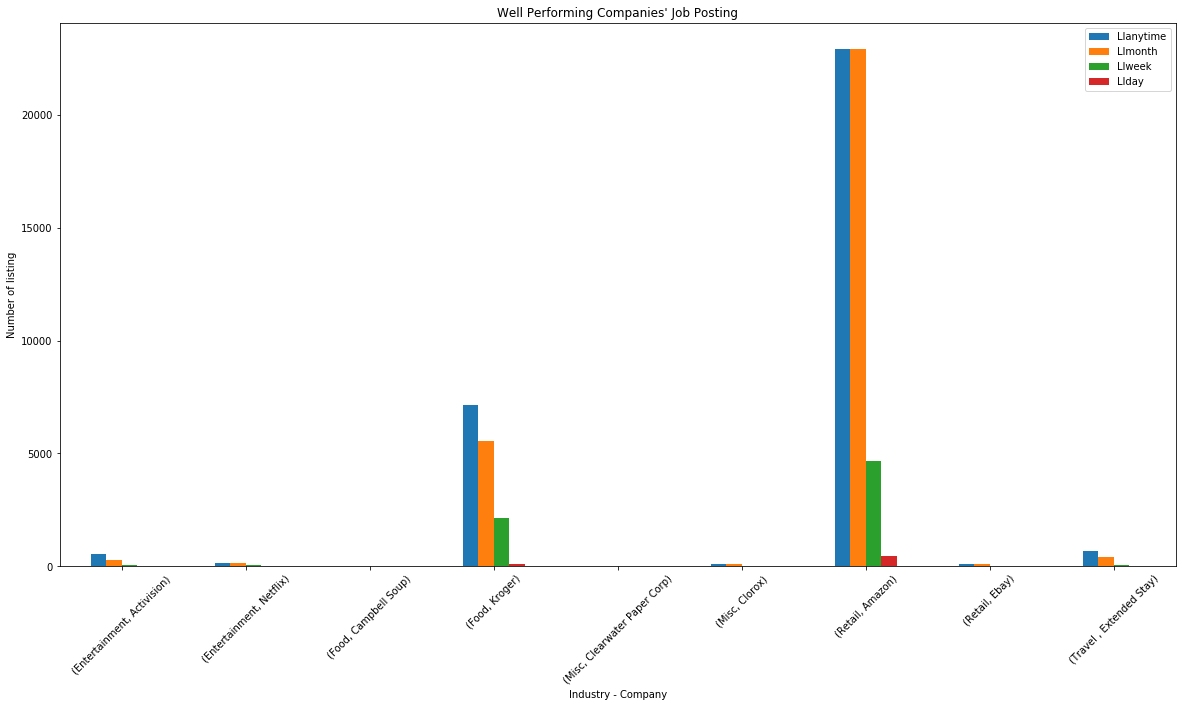

In [96]:
# Plot a bar graph for the companies that are performing well
hiring_data_li_gain.plot(kind = "bar", figsize = (20,10))

# Rotate the x ticks
plt.xticks(rotation = 45)

# Add label for y axis
plt.ylabel("Number of listing")

# Add label for x axis
plt.xlabel("Industry - Company")

# Add a title
plt.title("Well Performing Companies' Job Posting")

# Store the current figure 
total_us = plt.gcf()

# Show the graph
plt.show()

# Export and save the graph as .png
total_us.savefig("Well Performing Companies' Job Posting.png", bbox_inches = "tight")

In [98]:
# Groupy by the "Industry" and "Company" column
hiring_data_li_loss = hiring_data_li_loss.groupby(["Industry", "Company"])[["LIanytime", "LImonth", "LIweek", "LIday"]].max()

# Remove the comma in the data frame and change the type of numeric elements that are objects to float
hiring_data_li_loss["LImonth"] = hiring_data_li_loss["LImonth"].str.replace(",", "").astype(float)
hiring_data_li_loss["LIweek"] = hiring_data_li_loss["LIweek"].str.replace(",", "").astype(float)

# Print the data frame
hiring_data_li_loss

LIanytime  LImonth  LIweek  LIday
Industry      Company                                                     
Entertainment Cinemark                           0      0.0     0.0    0.0
              Live Nation Entertainment          0      1.0     0.0    0.0
Food          J Alexanders Holding               0      0.0     0.0    0.0
              McDonald's                      5412   5066.0  2849.0   89.0
Retail        Macys                             69     69.0    10.0    3.0
              TJ Maxx                          978    660.0   431.0    3.0
Travel        Mariott                           50     30.0    12.0    5.0
              United Airlines                   88     50.0    11.0    5.0

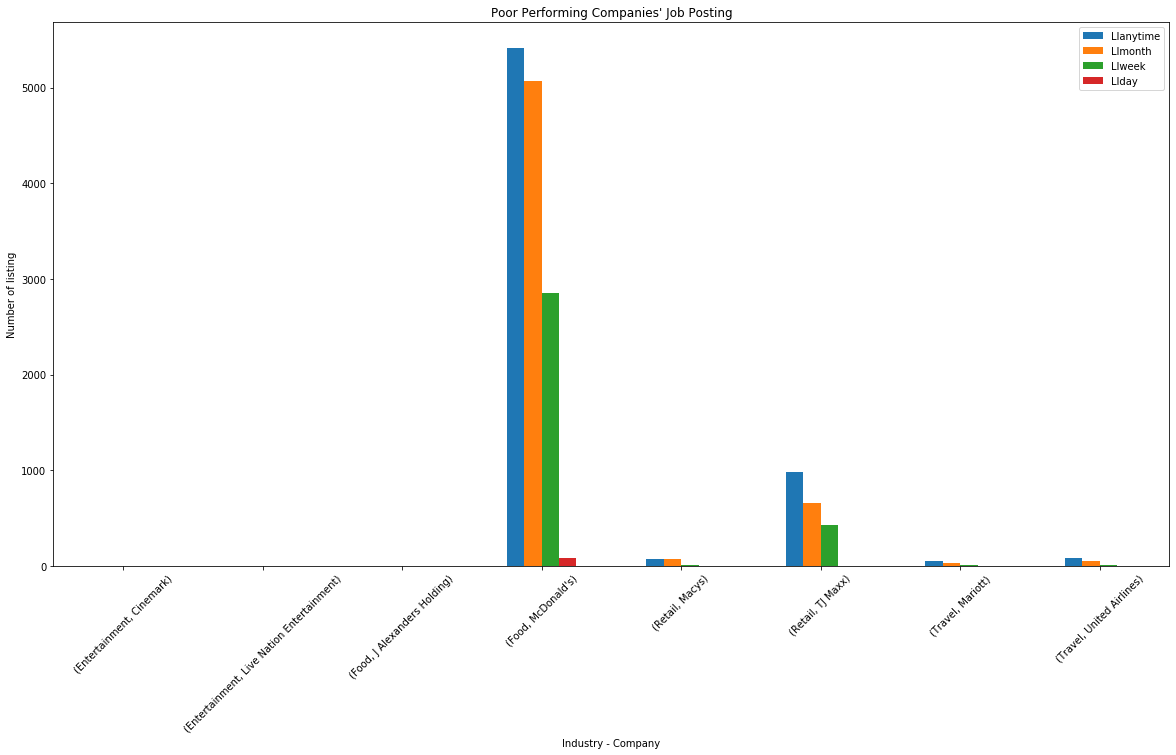

In [99]:
# Plot a bar graph for the companies that are not performing well
hiring_data_li_loss.plot(kind = "bar", figsize = (20,10))

# Rotate the x ticks
plt.xticks(rotation = 45)

# Add label for y axis
plt.ylabel("Number of listing")

# Add label for x axis
plt.xlabel("Industry - Company")

# Add a title
plt.title("Poor Performing Companies' Job Posting")

# Store the current figure 
total_us = plt.gcf()

# Show the graph
plt.show()

# Export and save the graph as .png
total_us.savefig("Poor Performing Companies' Job Posting.png", bbox_inches = "tight")